# 泰坦尼克号 二分类问题

训练和测试数据是一些乘客的个人信息以及存活状况，要尝试根据它生成合适的模型并预测其他人的存活状况。<br>
对，这是一个二分类问题，很多分类算法都可以解决。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 使得调用plot画图 或生成figure 画布时，可以直接在Python console中生成图像
%matplotlib inline

In [2]:
# 查看原始数据
data_train=pd.read_csv("./titanic/all/train.csv") # 默认是在根路径下
data_train.head(2) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


查看数据总体特征  可以看到其中Cabin 和Age 明显缺失 Embarked 有少量缺失

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


可以看到 有的数据有缺失值
* Age（年龄）只有714名乘客有记录
* Cabin（客舱）只有204名乘客是已知的

听过describe 可以看到大概有38%的人生还 age 的平均年龄大概为29 

In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 查看各变量与 survived 之间的关系

/Users/crq/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/crq/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


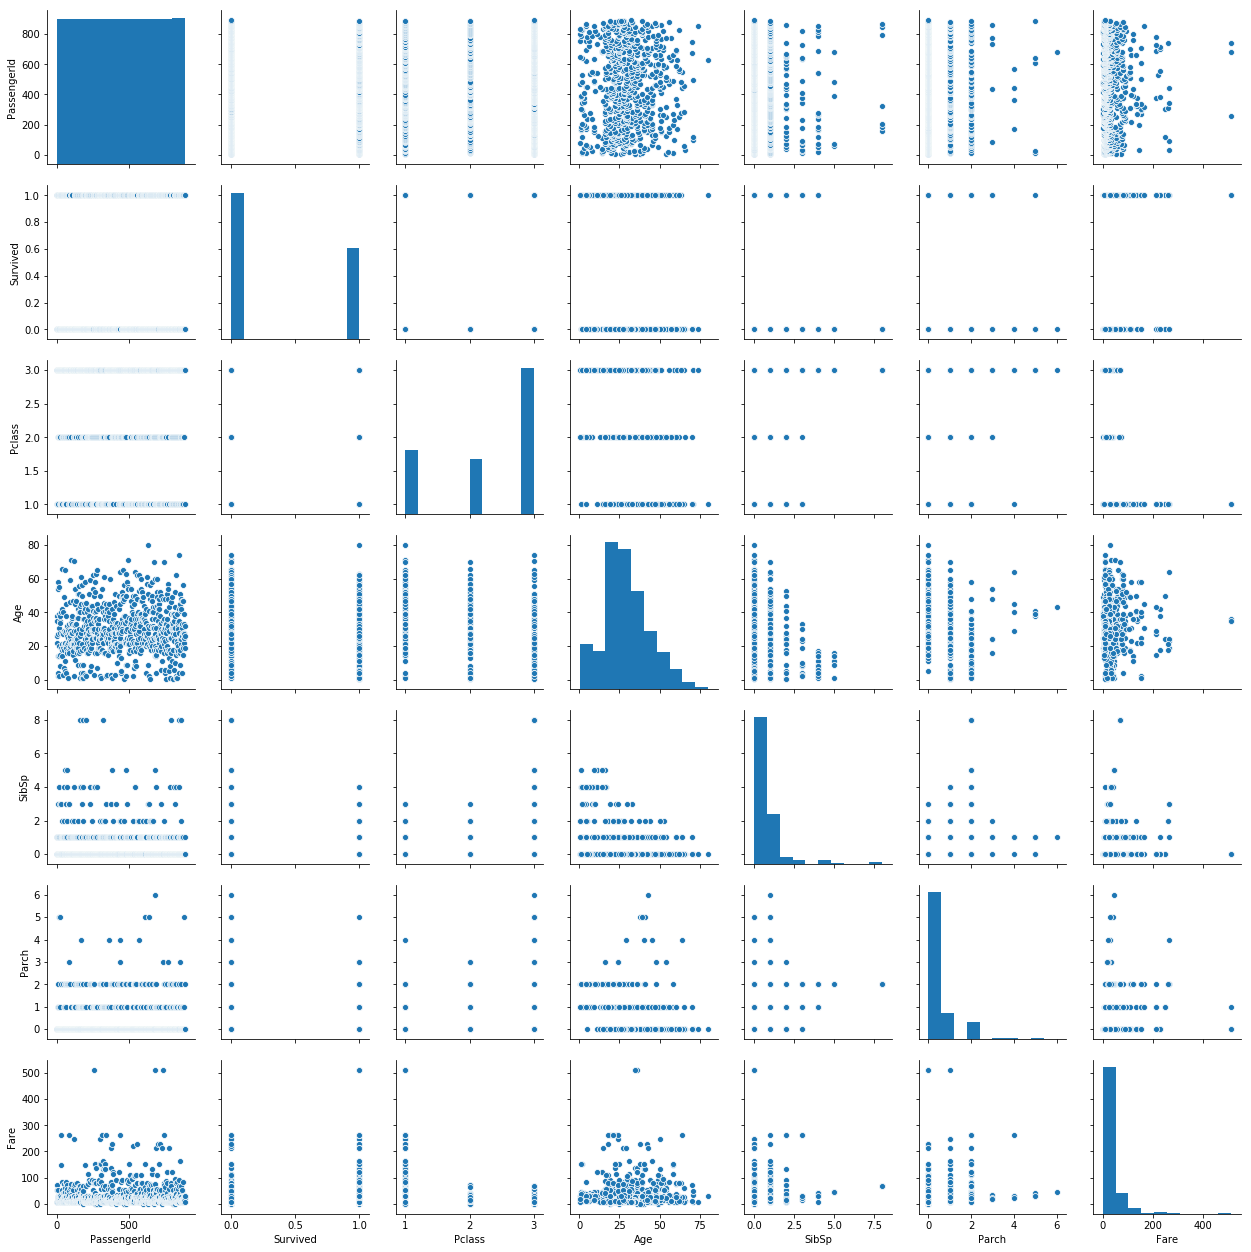

In [16]:
# 使用seaborn进行绘图
import seaborn as sns
sns.pairplot(data_train)

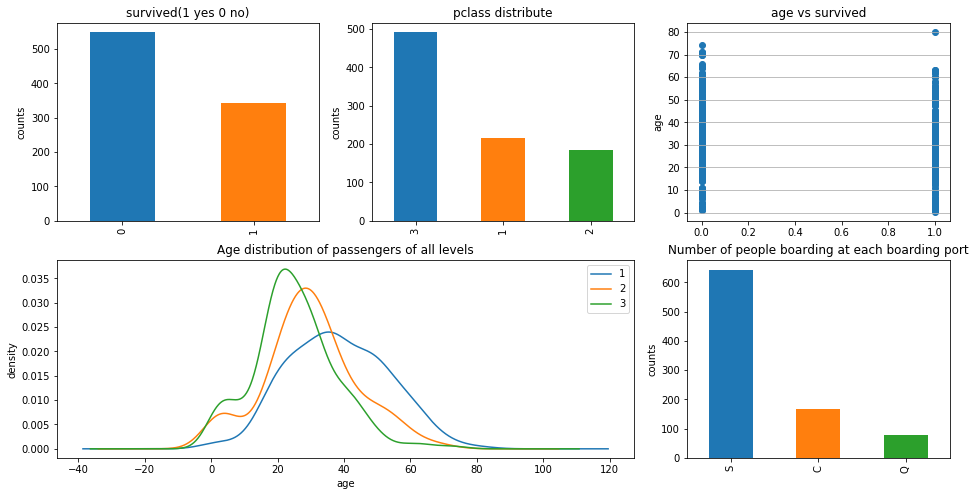

In [17]:
fig = plt.figure(figsize=(16,8))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"survived(1 yes 0 no)") # puts a title on our graph
plt.ylabel(u"counts")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"counts")
plt.title(u"pclass distribute")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"age vs survived")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density")  # 密度
plt.title(u"Age distribution of passengers of all levels")
plt.legend((u'1', u'2',u'3'),loc='best') # sets our legend for our graph. 舱位等级


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"Number of people boarding at each boarding port")
plt.ylabel(u"counts")  
plt.show()


age和survived还是有一定关系的  这里先不做具体的小孩 老人分类了吧....   后续

### 性别Sex与survived 关系

<Figure size 432x288 with 0 Axes>

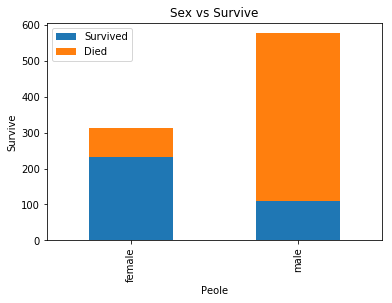

In [8]:
fig=plt.figure()
fig.set(alpha=0.2)  # 设置图表颜色alpha 参数

no_survived=data_train.Sex[data_train.Survived==0].value_counts() # value_counts 是数量
survived=data_train.Sex[data_train.Survived==1].value_counts()

df=pd.DataFrame({'Survived':survived,'Died':no_survived})
df.plot(kind='bar',stacked=True)
plt.title('Sex vs Survive')
plt.xlabel('Peole')
plt.ylabel('Survive')
plt.show()

大概38% 的人获救  平均年龄29.6 左右 平均仓位 是2.3  大部分人是2等仓或者1等仓

女性的生存的概率高于男性 

### age与survived 之间的关系

###查看各变量与survive 之间的关系  使用散点图进行表示查看，对数据分布情况做一个展示

In [18]:
# fig=plt.figure() ......    待续

### 家庭成员(SibSp/Parch)与生还情况

In [20]:
# 堂兄妹个数
family_s=data_train.groupby(['SibSp','Survived'])
df_s=pd.DataFrame(family_s.count()['PassengerId'])
df_s

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>PassengerId</th>
    </tr>
    <tr>
      <th>SibSp</th>
      <th>Survived</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">0</th>
      <th>0</th>
      <td>398</td>
    </tr>
    <tr>
      <th>1</th>
      <td>210</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>0</th>
      <td>97</td>
    </tr>
    <tr>
      <th>1</th>
      <td>112</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th>0</th>
      <td>15</td>
    </tr>
    <tr>
      <th>1</th>
      <td>13</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">3</th>
      <th>0</th>
      <td>12</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">4</th>
      <th>0</th>
      <td>15</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3</td>
    </tr>
    <tr>
      <th>5</th>
      <th>0</th>
      <td>5</td>
    </tr>
    <tr>
      <th>8</th>
      <th>0</th>
      <td>7</td>
    </tr>
  </tbody>
</table>
</div>

In [21]:
# 父母与小孩个数
family_p=data_train.groupby(['Parch','Survived'])
df_p=pd.DataFrame(family_p.count()['PassengerId'])
df_p

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>PassengerId</th>
    </tr>
    <tr>
      <th>Parch</th>
      <th>Survived</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">0</th>
      <th>0</th>
      <td>445</td>
    </tr>
    <tr>
      <th>1</th>
      <td>233</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>0</th>
      <td>53</td>
    </tr>
    <tr>
      <th>1</th>
      <td>65</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th>0</th>
      <td>40</td>
    </tr>
    <tr>
      <th>1</th>
      <td>40</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">3</th>
      <th>0</th>
      <td>2</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3</td>
    </tr>
    <tr>
      <th>4</th>
      <th>0</th>
      <td>4</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">5</th>
      <th>0</th>
      <td>4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
    </tr>
    <tr>
      <th>6</th>
      <th>0</th>
      <td>1</td>
    </tr>
  </tbody>
</table>
</div>

独自一人的乘客生还情况 明显劣于有家人相伴的乘客

### 舱位(Pclass)与生还情况

<Figure size 432x288 with 0 Axes>

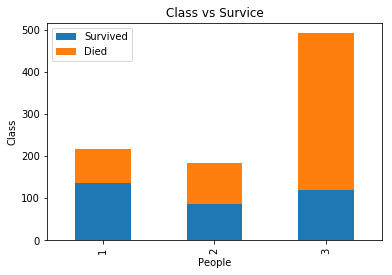

In [23]:
fig=plt.figure()
fig.set(alpha=0.2)
no_survived=data_train.Pclass[data_train.Survived==0].value_counts()
survived=data_train.Pclass[data_train.Survived==1].value_counts()
df=pd.DataFrame({'Survived':survived,'Died':no_survived})
df.plot(kind='bar',stacked=True)
plt.title('Class vs Survice')
plt.xlabel('People')
plt.ylabel('Class')
plt.show()

一等舱的生还率明显高于2 3 等舱

###(Embarked) 港口与生还情况

<Figure size 432x288 with 0 Axes>

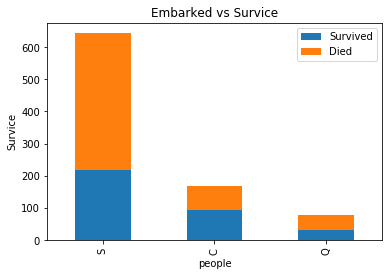

In [25]:
fig=plt.figure()
fig.set(alpha=0.2)
no_survived=data_train.Embarked[data_train.Survived==0].value_counts()
survived=data_train.Embarked[data_train.Survived==1].value_counts()
df_e=pd.DataFrame({'Survived':survived,'Died':no_survived})
df_e.plot(kind='bar',stacked=True)
plt.title('Embarked vs Survice')
plt.xlabel('people')
plt.ylabel('Survice')
plt.show()

C 港口的生还率更高？？ 

### 其他特征

ticket 是船票编号，和最后的结果没有太大的关系 不考虑纳入特征范围

cabin 只有204个乘客有值 缺失值太多 考虑是否需要该属性

In [27]:
#  查看Cabin 分布情况
data_train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
F33            3
E101           3
C22 C26        3
D              3
B58 B60        2
E44            2
B18            2
B35            2
B5             2
C123           2
C126           2
E67            2
B28            2
E121           2
B49            2
E25            2
D36            2
C65            2
C83            2
C92            2
B22            2
B20            2
B51 B53 B55    2
E24            2
D35            2
B77            2
              ..
B78            1
C47            1
A26            1
F G63          1
B82 B84        1
B38            1
E38            1
C91            1
A24            1
C54            1
C7             1
C87            1
E46            1
E49            1
D15            1
D37            1
C103           1
D47            1
C128           1
A7             1
D7             1
D28            1
T              1
E12            1
E34            1
B50            1
B37            1
C45           

分布及其分散 ,绝大多数Cabin 值只出现一次，如果作为类目，加入特征值未必有效

尝试查看cabin 值的有无和 survived 之间的关系

<Figure size 432x288 with 0 Axes>

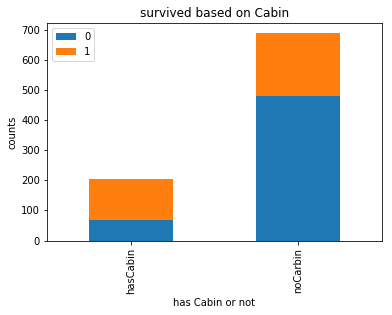

In [32]:
fig=plt.figure()
fig.set(alpha=0.2)
# 获得cabin 是否出现 对应的 survived 的人数  
survived_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
survived_noCabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()

df=pd.DataFrame({'hasCabin':survived_cabin,'noCarbin':survived_noCabin}).transpose()
df.plot(kind='bar',stacked=True)
plt.title('survived based on Cabin')
plt.xlabel('has Cabin or not')
plt.ylabel('counts')
plt.show()

貌似有Carbin的获救概率高一点 所以该特征暂时保留

## 数据清洗

主要针对Cabin 和age 的数据补充

### 缺失值常见处理方法
1. 若缺失的样本占总数比例极高，可能直接丢弃，因为作为特征带入样本，可能反倒引入噪声数据 对模型造成影响
2. 若缺值的样本适中,而该属性非连续值特征属性(比如说是string类型的类目属性)

使用sklearn中的RandomForest 拟合缺失数据

In [ ]:
from  sklearn import Random